# Chapter 5

## Problem 1

1. Using basic statistical properties of the variance, as well as singlevariable calculus, derive (5.6). In other words, prove that α given by
(5.6) does indeed minimize Var(αX + (1 − α)Y ).


$Var(\alpha X+(1-\alpha)Y)= \alpha^2\sigma_X^2+(1-\alpha)^2\sigma_Y^2+2\alpha(1-\alpha)\sigma_{XY}$

$\frac{d}{d\alpha}\left(\alpha^2(\sigma_X^2+\sigma_{Y}^2-2\sigma_{XY})-2\alpha(\sigma_Y^2-\sigma_{XY})+\sigma_Y^2\right) = 0$ results to (5.6)

## Problem 2

We will now derive the probability that a given observation is part
of a bootstrap sample. Suppose that we obtain a bootstrap sample
from a set of n observations.

(a) What is the probability that the first bootstrap observation is
not the jth observation from the original sample? Justify your
answer.

1-1/n, probability of 1st is any observation of original sample is 1, exclude probability that it is jth observation.

(b) What is the probability that the second bootstrap observation
is not the jth observation from the original sample?

1-1/n, similar

(c) Argue that the probability that the jth observation is not in the
bootstrap sample is (1 − 1/n)n.


So probability that any observation is not jth obsevation in original sample is the product of probabilities above for each n observations $p_{out}=(1-1/n)^n$

(d) When n = 5, what is the probability that the jth observation is
in the bootstrap sample?
(e) When n = 100, what is the probability that the jth observation

Probability that jth obserbvation is in bootstrap set is (1-p_{out})

In [131]:
Probin=function(n){
    return(1-(1-1/n)^n)
}
Probin(5)

[1] 0.67232

(e) When n = 100, what is the probability that the jth observation
is in the bootstrap sample?

n=100

In [132]:
Probin(100)

[1] 0.6339677

(f) When n = 10,000, what is the probability that the jth observation is in the bootstrap sample?

n =10000

In [133]:
Probin(10000)

[1] 0.632139

(g)  Create a plot that displays, for each integer value of n from 1
to 100, 000, the probability that the jth observation is in the
bootstrap sample. Comment on what you observe.

Plot of probability that the jth observation is in sample.

In [134]:
x=1:100000

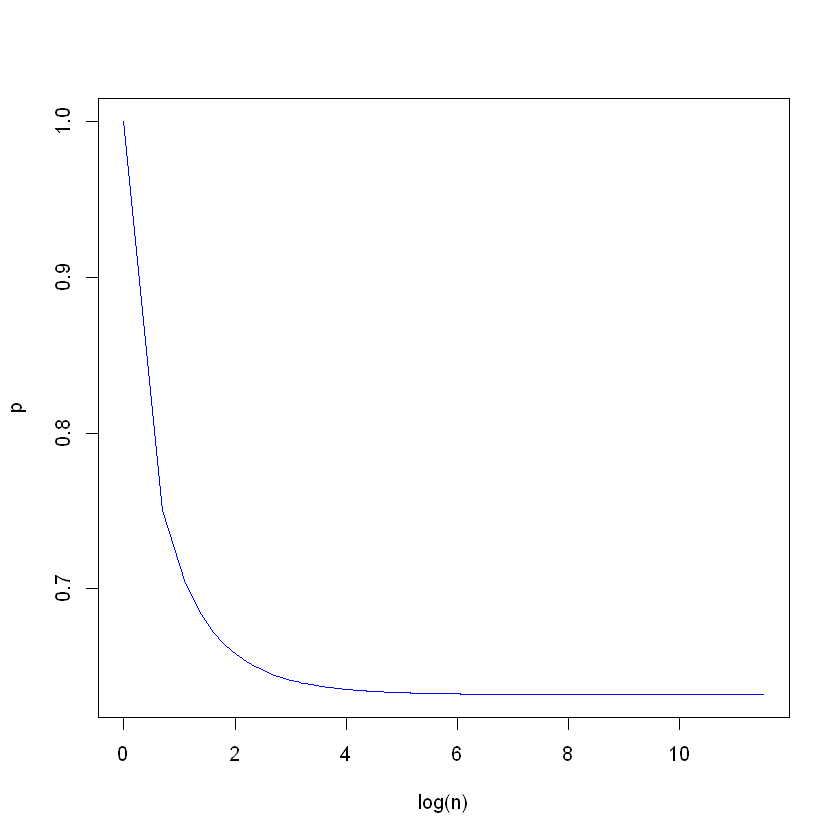

In [135]:
plot(log(x), Probin(x), col = "blue", xlab = "log(n)", ylab = "p", type='l')

(h) We will now investigate numerically the probability that a bootstrap sample of size n = 100 contains the jth observation. Here
j = 4. We repeatedly create bootstrap samples, and each time
we record whether or not the fourth observation is contained in
the bootstrap sample.

In [136]:
store=rep(NA,10000)
for(i in 1:10000){
    store[i]=sum(sample(1:100, rep=TRUE)==4)>0
}
mean(store)

[1] 0.6319

 The probability converging to 0.63 at large n, so the mean probability is close to this number.

## Problem 3

(a) Explain how k-fold cross-validation is implemented

The dataset is divided randomly by k equal parts. Eeach subset is used as validation set when the rest is used for model training.

(b) What are the advantages and disadvantages of k-fold crossvalidation relative to:
i. The validation set approach?
ii. LOOCV?

i. Advange: We can check how well model performs on any subsets. Disadvantage: It is slower.
ii. Disadvantage: Les observations for training. Advantage: It is faster.

## Problem 4

Suppose that we use some statistical learning method to make a prediction for the response Y for a particular value of the predictor X.
Carefully describe how we might estimate the standard deviation of
our prediction

Do the bootstrap, find X for different generated samples then find std for Xsin all samples. 

## Functions

In [137]:
PredictClassification=function(model, formula, data, datapredict, family=NULL, subset=NULL){
    model_fits = do.call(model, list(formula, data=quote(data), family=quote(family), subset=subset))
    print(model_fits)
    print(summary(model_fits))
    return(predict(model_fits, datapredict, type="response"))
}
Predictions=function(y_probs, y, l1, l2, length, threshold=0.5){
    y_pred = rep(l1, length)
    y_pred[y_probs>threshold]=l2
    #confusion matrix
    cm=table(y_pred, y)
    return(cm)
}
PrintResult=function(cm, test.X){
   l=dim(test.X)[1]
   accuracy=(cm[1]+cm[4])/l
   error = 1- accuracy
   tp = cm[4]/sum(test.X$default=='Yes')
   fp = 1 - tp
   print("over all accuracy")
   print(accuracy)
   print("error")
   print(error)
   print("true positive")
   print(tp)
   print("false positive")
   print(fp)    
}

## Problem 5

In [138]:
library(ISLR)
library(boot)
library(caret)
library(MASS)
head(Default)

default,student,balance,income
No,No,729.5265,44361.625
No,Yes,817.1804,12106.135
No,No,1073.5492,31767.139
No,No,529.2506,35704.494
No,No,785.6559,38463.496
No,Yes,919.5885,7491.559


In [139]:
cy=sum(Default$default=='Yes')
print(cy)

[1] 333


In [140]:
l=dim(Default)[1]
print(l)

[1] 10000


(a) Fit a logistic regression model that uses income and balance to
predict default.

The outcome is very imbalanced

In [141]:
glm.probs=PredictClassification('glm', default~balance+income, Default, Default, family=binomial)


Call:  glm(formula = default ~ balance + income, family = family, data = data, 
    subset = NULL)

Coefficients:
(Intercept)      balance       income  
 -1.154e+01    5.647e-03    2.081e-05  

Degrees of Freedom: 9999 Total (i.e. Null);  9997 Residual
Null Deviance:	    2921 
Residual Deviance: 1579 	AIC: 1585

Call:
glm(formula = default ~ balance + income, family = family, data = data, 
    subset = NULL)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
A

In [142]:
cm=Predictions(glm.probs, Default$default, "No", "Yes", l, threshold=0.4)  
cm

      y
y_pred   No  Yes
   No  9600  202
   Yes   67  131

In [143]:
PrintResult(cm, Default)

[1] "over all accuracy"
[1] 0.9731
[1] "error"
[1] 0.0269
[1] "true positive"
[1] 0.3933934
[1] "false positive"
[1] 0.6066066


(b) Using the validation set approach, estimate the test error of this
model. In order to do this, you must perform the following steps:

i. Split the sample set into a training set and a validation set.

In [144]:
set.seed(1)
lt=2000
test=sample(1:lt)
test.X=Default[test,]

ii. Fit a multiple logistic regression model using only the training observations.

In [145]:
glm.probs=PredictClassification('glm',formula = default ~ balance + income, data = Default[-test,], test.X, family = binomial)


Call:  glm(formula = default ~ balance + income, family = family, data = data, 
    subset = NULL)

Coefficients:
(Intercept)      balance       income  
 -1.127e+01    5.526e-03    1.706e-05  

Degrees of Freedom: 7999 Total (i.e. Null);  7997 Residual
Null Deviance:	    2314 
Residual Deviance: 1263 	AIC: 1269

Call:
glm(formula = default ~ balance + income, family = family, data = data, 
    subset = NULL)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3910  -0.1461  -0.0590  -0.0220   3.7094  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.127e+01  4.769e-01 -23.633  < 2e-16 ***
balance      5.526e-03  2.493e-04  22.164  < 2e-16 ***
income       1.706e-05  5.564e-06   3.066  0.00217 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2313.6  on 7999  degrees of freedom
Residual deviance: 1263.2  on 7997  degrees of freedom
A

iii. Obtain a prediction of default status for each individual in
the validation set by computing the posterior probability of
default for that individual, and classifying the individual to
the default category if the posterior probability is greater
than 0.5.

In [146]:
cm=Predictions(glm.probs, test.X$default, "No", "Yes", lt, threshold=0.5)  
cm

      y
y_pred   No  Yes
   No  1927   52
   Yes    3   18

iv. Compute the validation set error, which is the fraction of
the observations in the validation set that are misclassified.


In [147]:
PrintResult(cm, test.X)

[1] "over all accuracy"
[1] 0.9725
[1] "error"
[1] 0.0275
[1] "true positive"
[1] 0.2571429
[1] "false positive"
[1] 0.7428571


The outcome is imbalanced. This explaines small error over all. Theres small percentage of false negative but large of false positive, which are more important. So it would be good to make smaller probability threshold identifying positive outcome.

(c) Repeat the process in (b) three times, using three different splits
of the observations into a training set and a validation set. Comment on the results obtained.

In [148]:
set.seed(1)
lt=1000
train=sample(seq(l),l-lt,)
test.X=Default[-train,]

In [149]:
glm.probs=PredictClassification('glm',formula = default ~ balance + income, data = Default[train,], test.X, family = binomial)


Call:  glm(formula = default ~ balance + income, family = family, data = data, 
    subset = NULL)

Coefficients:
(Intercept)      balance       income  
 -1.167e+01    5.652e-03    2.384e-05  

Degrees of Freedom: 8999 Total (i.e. Null);  8997 Residual
Null Deviance:	    2604 
Residual Deviance: 1396 	AIC: 1402

Call:
glm(formula = default ~ balance + income, family = family, data = data, 
    subset = NULL)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4873  -0.1420  -0.0567  -0.0210   3.7315  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.167e+01  4.629e-01 -25.204  < 2e-16 ***
balance      5.652e-03  2.401e-04  23.542  < 2e-16 ***
income       2.384e-05  5.313e-06   4.487 7.22e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2603.6  on 8999  degrees of freedom
Residual deviance: 1396.1  on 8997  degrees of freedom
A

In [150]:
cm=Predictions(glm.probs, test.X$default, "No", "Yes", lt, threshold=0.5)  
cm

      y
y_pred  No Yes
   No  962  28
   Yes   1   9

In [151]:
PrintResult(cm, test.X)

[1] "over all accuracy"
[1] 0.971
[1] "error"
[1] 0.029
[1] "true positive"
[1] 0.2432432
[1] "false positive"
[1] 0.7567568


In [152]:
set.seed(1)
lt=3000
train=sample(seq(l), l-lt, replace = FALSE)
test.X=Default[-train,]

In [153]:
glm.probs=PredictClassification('glm',formula = default ~ balance + income, data = Default[train,], test.X, family = binomial)


Call:  glm(formula = default ~ balance + income, family = family, data = data, 
    subset = NULL)

Coefficients:
(Intercept)      balance       income  
 -1.167e+01    5.574e-03    2.560e-05  

Degrees of Freedom: 6999 Total (i.e. Null);  6997 Residual
Null Deviance:	    2030 
Residual Deviance: 1080 	AIC: 1086

Call:
glm(formula = default ~ balance + income, family = family, data = data, 
    subset = NULL)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4481  -0.1402  -0.0561  -0.0211   3.3484  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.167e+01  5.214e-01 -22.379  < 2e-16 ***
balance      5.574e-03  2.678e-04  20.816  < 2e-16 ***
income       2.560e-05  6.012e-06   4.258 2.06e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2030.3  on 6999  degrees of freedom
Residual deviance: 1079.6  on 6997  degrees of freedom
A

In [154]:
accuracy=Predictions(glm.probs, test.X$default, "No", "Yes", lt, threshold=0.5)  
accuracy

      y
y_pred   No  Yes
   No  2896   78
   Yes    2   24

In [155]:
PrintResult(cm, test.X)

[1] "over all accuracy"
[1] 0.3236667
[1] "error"
[1] 0.6763333
[1] "true positive"
[1] 0.08823529
[1] "false positive"
[1] 0.9117647


The larger test and smaler train set the percentage of false positive is large.

(d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable
for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a
dummy variable for student leads to a reduction in the test error
rate.

Adding students

In [156]:
glm.probs=PredictClassification('glm',formula = default ~ balance + income+student, data = Default[train,], test.X, family = binomial)


Call:  glm(formula = default ~ balance + income + student, family = family, 
    data = data, subset = NULL)

Coefficients:
(Intercept)      balance       income   studentYes  
 -1.095e+01    5.678e-03    6.273e-06   -7.167e-01  

Degrees of Freedom: 6999 Total (i.e. Null);  6996 Residual
Null Deviance:	    2030 
Residual Deviance: 1074 	AIC: 1082

Call:
glm(formula = default ~ balance + income + student, family = family, 
    data = data, subset = NULL)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4482  -0.1374  -0.0540  -0.0202   3.4027  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.095e+01  5.880e-01 -18.616   <2e-16 ***
balance      5.678e-03  2.741e-04  20.715   <2e-16 ***
income       6.273e-06  9.845e-06   0.637    0.524    
studentYes  -7.167e-01  2.886e-01  -2.483    0.013 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null d

In [157]:
cm=Predictions(glm.probs, test.X$default, "No", "Yes", lt, threshold = 0.5)  
cm

      y
y_pred   No  Yes
   No  2896   81
   Yes    2   21

In [158]:
PrintResult(cm, test.X)

[1] "over all accuracy"
[1] 0.9723333
[1] "error"
[1] 0.02766667
[1] "true positive"
[1] 0.2058824
[1] "false positive"
[1] 0.7941176


There is less false positives in this case. P value for income becomes large. Without income the result is a bit better, see below.

In [159]:
glm.probs=PredictClassification('glm',formula = default ~ balance + student, data = Default[train,], test.X, family = binomial)


Call:  glm(formula = default ~ balance + student, family = family, data = data, 
    subset = NULL)

Coefficients:
(Intercept)      balance   studentYes  
 -10.700217     0.005683    -0.859113  

Degrees of Freedom: 6999 Total (i.e. Null);  6997 Residual
Null Deviance:	    2030 
Residual Deviance: 1074 	AIC: 1080

Call:
glm(formula = default ~ balance + student, family = family, data = data, 
    subset = NULL)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4261  -0.1377  -0.0542  -0.0203   3.4070  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.070e+01  4.395e-01 -24.349  < 2e-16 ***
balance      5.684e-03  2.739e-04  20.748  < 2e-16 ***
studentYes  -8.591e-01  1.815e-01  -4.733 2.21e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2030.3  on 6999  degrees of freedom
Residual deviance: 1073.9  on 6997  degrees of freedom

In [160]:
cm=Predictions(glm.probs, test.X$default, "No", "Yes", lt, threshold=0.5)  
cm

      y
y_pred   No  Yes
   No  2896   80
   Yes    2   22

In [161]:
PrintResult(cm, test.X)

[1] "over all accuracy"
[1] 0.9726667
[1] "error"
[1] 0.02733333
[1] "true positive"
[1] 0.2156863
[1] "false positive"
[1] 0.7843137


## Problem 6

We continue to consider the use of a logistic regression model to
predict the probability of default using income and balance on the
Default data set. In particular, we will now compute estimates for
the standard errors of the income and balance logistic regression coefficients in two different ways: (1) using the bootstrap, and (2) using
the standard formula for computing the standard errors in the glm()
function. Do not forget to set a random seed before beginning your
analysis.

(a) Using the summary() and glm() functions, determine the estimated standard errors for the coefficients associated with income
and balance in a multiple logistic regression model that uses
both predictors.

In [162]:
summary(glm(default~balance+income, data=Default, family=binomial))


Call:
glm(formula = default ~ balance + income, family = binomial, 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


(b) Write a function, boot.fn(), that takes as input the Default data
set as well as an index of the observations, and that outputs
the coefficient estimates for income and balance in the multiple
logistic regression model.

In [163]:
boot.fn=function(data, formula, indices)
    return(coef(glm(formula, data=data[indices,], family=binomial)))

(c) Use the boot() function together with your boot.fn() function to
estimate the standard errors of the logistic regression coefficients
for income and balance.

In [164]:
boot(Default, statistic=boot.fn, R=1000, formula=default ~ income+balance)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Default, statistic = boot.fn, R = 1000, formula = default ~ 
    income + balance)


Bootstrap Statistics :
         original        bias     std. error
t1* -1.154047e+01 -3.900813e-02 4.347702e-01
t2*  2.080898e-05  1.595620e-07 4.862429e-06
t3*  5.647103e-03  1.847244e-05 2.300787e-04

(d) Comment on the estimated standard errors obtained using the
glm() function and using your bootstrap function.

Bootstrap errors are slightly different from errors in glm summary.

## Problem 7

In [165]:
head(Weekly)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


In [166]:
summary(glm(formula = Direction ~ Lag1+Lag2, family = 'binomial', data = Weekly))


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = "binomial", data = Weekly)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.623  -1.261   1.001   1.083   1.506  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.22122    0.06147   3.599 0.000319 ***
Lag1        -0.03872    0.02622  -1.477 0.139672    
Lag2         0.06025    0.02655   2.270 0.023232 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1488.2  on 1086  degrees of freedom
AIC: 1494.2

Number of Fisher Scoring iterations: 4


In [167]:
test = 1:1 

In [168]:
pred=PredictClassification('glm', Direction ~ Lag1+Lag2, Weekly[-test,], Weekly[test,], family=binomial)


Call:  glm(formula = Direction ~ Lag1 + Lag2, family = family, data = data, 
    subset = NULL)

Coefficients:
(Intercept)         Lag1         Lag2  
    0.22324     -0.03843      0.06085  

Degrees of Freedom: 1087 Total (i.e. Null);  1085 Residual
Null Deviance:	    1495 
Residual Deviance: 1487 	AIC: 1493

Call:
glm(formula = Direction ~ Lag1 + Lag2, family = family, data = data, 
    subset = NULL)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6258  -1.2617   0.9999   1.0819   1.5071  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.22324    0.06150   3.630 0.000283 ***
Lag1        -0.03843    0.02622  -1.466 0.142683    
Lag2         0.06085    0.02656   2.291 0.021971 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1494.6  on 1087  degrees of freedom
Residual deviance: 1486.5  on 1085  degrees of freedom
AIC: 1492.5

Nu

In [169]:
print(pred)
if(pred > 0.5){pred='Up'
}else{pred='Down'
    }
print(Weekly$Direction[9])
if(pred!=Weekly$Direction[9]){print(1)
}else{print(0)
    }

        1 
0.5713923 
[1] Up
Levels: Down Up
[1] 0


In [170]:
c=0
l=dim(Weekly)[1]
for(i in 1:l){
    test=i:i
    pred=predict(glm(formula = Direction ~ Lag1+Lag2, data = Weekly[-test,], family = 'binomial'), Weekly[test,], type="response")
    if(pred > 0.5){pred='Up'
    }else{pred='Down'
    }
    if(pred!=Weekly$Direction[i]){
        c=c+1
    }
}
print("Error")
print(c/l)

[1] "Error"
[1] 0.4499541


## Problem 8

In [171]:
set.seed(1)
x=rnorm(100)
y=x-2*x^2+rnorm(100)
df = data.frame(x,y)

n=100, p=1,
$y=x-2 x^2$

In [172]:
model <- train(y ~ x, method = "lm", data=df,
               trControl = trainControl(method = "LOOCV"))
print(summary(model))
print(model)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5161 -0.6800  0.6812  1.5491  3.8183 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.6254     0.2619  -6.205 1.31e-08 ***
x             0.6925     0.2909   2.380   0.0192 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.6 on 98 degrees of freedom
Multiple R-squared:  0.05465,	Adjusted R-squared:  0.045 
F-statistic: 5.665 on 1 and 98 DF,  p-value: 0.01924

Linear Regression 

100 samples
  1 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 99, 99, 99, 99, 99, 99, ... 
Resampling results:

  RMSE     Rsquared    MAE     
  2.69966  0.00130345  1.921879

Tuning parameter 'intercept' was held constant at a value of TRUE


In [173]:
model <- train(y ~ x+I(x^2), method = "lm", data=df,
               trControl = trainControl(method = "LOOCV"))
print(summary(model))
print(model)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9650 -0.6254 -0.1288  0.5803  2.2700 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.05672    0.11766   0.482    0.631    
x            1.01716    0.10798   9.420  2.4e-15 ***
`I(x^2)`    -2.11892    0.08477 -24.997  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.958 on 97 degrees of freedom
Multiple R-squared:  0.873,	Adjusted R-squared:  0.8704 
F-statistic: 333.3 on 2 and 97 DF,  p-value: < 2.2e-16

Linear Regression 

100 samples
  1 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 99, 99, 99, 99, 99, 99, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.9682064  0.8663108  0.7829438

Tuning parameter 'intercept' was held constant at a value of TRUE


In [174]:
model <- train(y ~ x+I(x^2)+I(x^3), method = "lm", data=df,
               trControl = trainControl(method = "LOOCV"))
print(summary(model))
print(model)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9765 -0.6302 -0.1227  0.5545  2.2843 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.06151    0.11950   0.515    0.608    
x            0.97528    0.18728   5.208 1.09e-06 ***
`I(x^2)`    -2.12379    0.08700 -24.411  < 2e-16 ***
`I(x^3)`     0.01764    0.06429   0.274    0.784    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9626 on 96 degrees of freedom
Multiple R-squared:  0.8731,	Adjusted R-squared:  0.8691 
F-statistic: 220.1 on 3 and 96 DF,  p-value: < 2.2e-16

Linear Regression 

100 samples
  1 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 99, 99, 99, 99, 99, 99, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.9780705  0.8637902  0.7924894

Tuning parameter 'intercept' was held constant at a value of TRUE


In [175]:
model <- train(y ~ x+I(x^2)+I(x^3)+I(x^4), method = "lm", data=df,
               trControl = trainControl(method = "LOOCV"))
print(summary(model))
print(model)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0550 -0.6212 -0.1567  0.5952  2.2267 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.156703   0.139462   1.124    0.264    
x            1.030826   0.191337   5.387 5.17e-07 ***
`I(x^2)`    -2.409898   0.234855 -10.261  < 2e-16 ***
`I(x^3)`    -0.009133   0.067229  -0.136    0.892    
`I(x^4)`     0.069785   0.053240   1.311    0.193    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9591 on 95 degrees of freedom
Multiple R-squared:  0.8753,	Adjusted R-squared:  0.8701 
F-statistic: 166.7 on 4 and 95 DF,  p-value: < 2.2e-16

Linear Regression 

100 samples
  1 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 99, 99, 99, 99, 99, 99, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.9766805  0.8639008  0.8019279

Tuning parameter 'intercept' 

Lowest RMSE is for  y~x+x^2 as it is expected. P values are lowest for coeffitients

## Problem 9

In [176]:
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [177]:
mu=mean(Boston$medv)
mu

[1] 22.53281

In [178]:
n=dim(Boston)[1]
sd(Boston$medv)/sqrt(n)

[1] 0.4088611

In [179]:
mean.fn= function(data, index){
    return(mean(data[index,]$medv))
}

In [180]:
bt=boot(Boston, statistic=mean.fn, R=1000)
bt


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Boston, statistic = mean.fn, R = 1000)


Bootstrap Statistics :
    original      bias    std. error
t1* 22.53281 0.007100593   0.3893556

The error is slightly higher than just from standard diviation from all data set.

Confidence interval

In [181]:
mu1=sd(bt$t)
mu-2*mu1

[1] 21.7541

In [182]:
mu+2*mu1

[1] 23.31152

In [183]:
med=median(Boston$medv)
med

[1] 21.2

In [184]:
median.fn= function(data, index){
    return(median(data[index,]$medv))
}

In [185]:
bt=boot(Boston, statistic=median.fn, R=1000)
bt


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Boston, statistic = median.fn, R = 1000)


Bootstrap Statistics :
    original  bias    std. error
t1*     21.2 0.00215   0.3822617

In [186]:
mu01=quantile(Boston$medv, 0.1)
mu01

10% 
12.75

In [187]:
quantile01.fn= function(data, index){
    return(quantile(data[index,]$medv, 0.1))
}

In [188]:
bt=boot(Boston, quantile01.fn, R=1000)
bt


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Boston, statistic = quantile01.fn, R = 1000)


Bootstrap Statistics :
    original  bias    std. error
t1*    12.75   0.007   0.4839837

Quantile error is larger than errors for mean and median.